Connor Contursi - Task 1

# Data Processing

In [70]:
# Imports
import numpy as np
import pandas as pd
import os

# Module imports
from skimage import io
from sklearn import metrics
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#---------------------------------------------------

# Accesses data
folder = 'C:/Users/indie/OneDrive/Desktop/images/Connor Contursi - 2022-02-10 23.42.14 - Connor_Contursi' # provide relative path to folder

# Gets images
images = [os.path.join(root, filename)
          for root, dirs, files in os.walk(folder)
          for filename in files
          if filename.lower().endswith('.jpg')]

#Combines images into a list
ic = []
for img in images:
    ic.append(io.imread(img))

# Coverts list into array and then reshapes it
a, b, c = ic[0].shape
ica = np.array(ic)
ica = ica.flatten().reshape(len(ic), a * b * c)

# Creates Y labels for different classes of images
y = np.zeros(len(ic))
for a in range (int((1/3)*len(ic)), int((2/3)*len(ic))):
    y[a] = 1
    
for b in range (int((2/3)*len(ic)), len(ic)):
    y[b] = 2

### Logistic Regression Model & Results

              precision    recall  f1-score   support

         0.0       0.56      0.42      0.48        12
         1.0       0.57      0.44      0.50         9
         2.0       0.57      0.89      0.70         9

    accuracy                           0.57        30
   macro avg       0.57      0.58      0.56        30
weighted avg       0.57      0.57      0.55        30



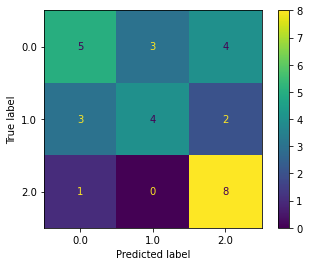

In [71]:
#Train test split of 80-20
x_train, x_test, y_train, y_test = train_test_split(ica, y, test_size = 0.20)

# creates logistic regression classifier; fits data with trained sets; generates predictions from test split
model = LogisticRegression(max_iter = 10000)
model.fit(x_train, y_train)
y_prediction = model.predict(x_test)

# generates confusion matrix and plots data
matrix = confusion_matrix(y_test, y_prediction)
plot_confusion_matrix(model, x_test, y_test)

# prints precision, recall, and f1 score
print(metrics.classification_report(y_test, y_prediction))

### Decision Trees Model & Results


              precision    recall  f1-score   support

         0.0       0.50      0.56      0.53         9
         1.0       0.00      0.00      0.00         9
         2.0       0.47      0.58      0.52        12

    accuracy                           0.40        30
   macro avg       0.32      0.38      0.35        30
weighted avg       0.34      0.40      0.37        30



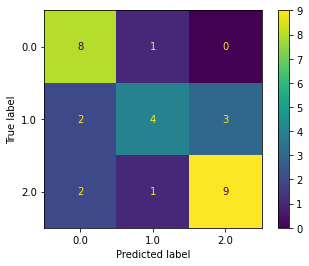

In [61]:
# Train test split of 80-20
x_train, x_test, y_train, y_test = train_test_split(ica, y, test_size = 0.20)

# creates decision tree classifier; fits data with trained sets; generates predictions from test split
model = DecisionTreeClassifier(random_state = 0)
model.fit(x_train, y_train)
y_prediciton = model.predict(x_test)

# generates confusion matrix and plots data
matrix = confusion_matrix(y_test, y_prediction)
plot_confusion_matrix(model, x_test, y_test)

# prints precision, recall, and f1 score
print(metrics.classification_report(y_test, y_prediction))

### Random Forests Model & Results

              precision    recall  f1-score   support

         0.0       0.10      0.10      0.10        10
         1.0       0.20      0.09      0.13        11
         2.0       0.27      0.44      0.33         9

    accuracy                           0.20        30
   macro avg       0.19      0.21      0.19        30
weighted avg       0.19      0.20      0.18        30



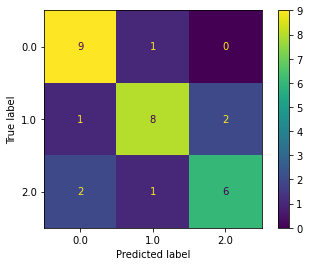

In [62]:
# Train test split of 80-20
x_train, x_test, y_train, y_test = train_test_split(ica, y, test_size = 0.20)

# creates random forest classifier; fits data with trained sets; generates predictions from test split
model = RandomForestClassifier(random_state = 0)
model.fit(x_train, y_train)
y_prediciton = model.predict(x_test)

# generates confusion matrix and plots data
matrix = confusion_matrix(y_test, y_prediction)
plot_confusion_matrix(model, x_test, y_test)

# prints precision, recall, and f1 score
print(metrics.classification_report(y_test, y_prediction))

From all of the models, we can see that the precision of the data varies quite a bit more than we'd like to see.